In [2]:
data_folder = "./data"
dataset_name = "parkinsons.data"

import numpy as np
import pandas as pd

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", -1)

<ipython-input-2-c73cbc9171ad>:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


In [3]:
data_delimiter=","

data = pd.read_csv(data_folder + "/" + dataset_name, delimiter=data_delimiter)

data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.000070,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.000080,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.000090,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.000110,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.000080,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.000030,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.000030,0.00144,0.00182,0.00431,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.000060,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.000060,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


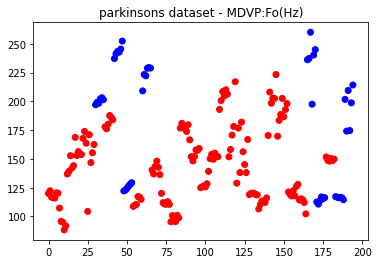

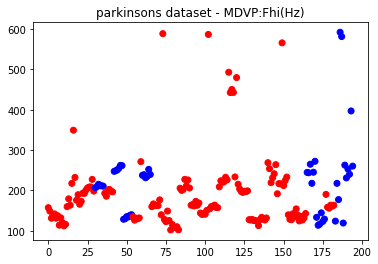

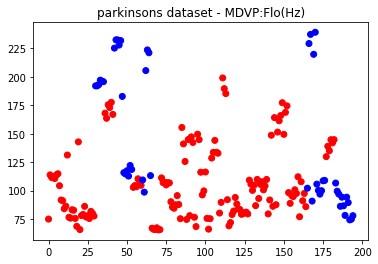

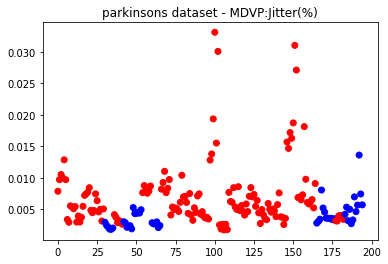

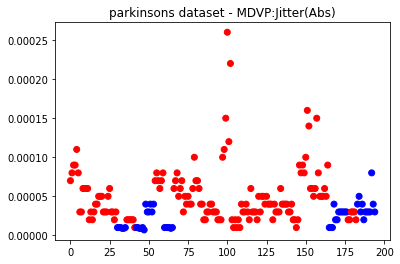

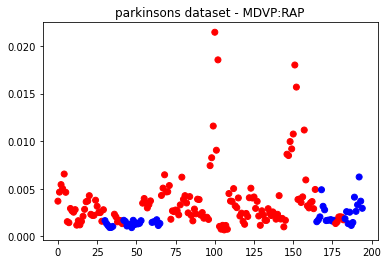

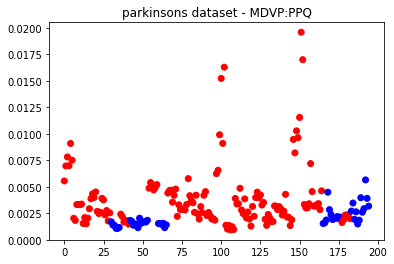

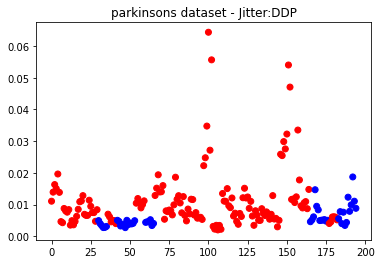

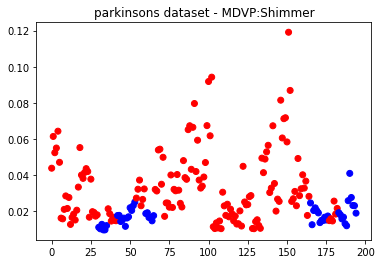

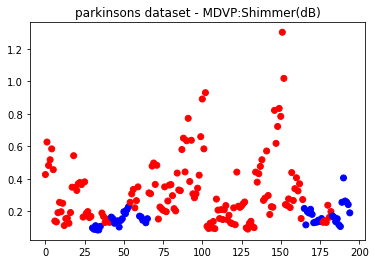

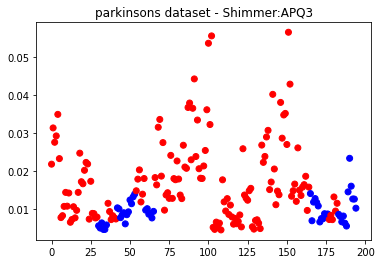

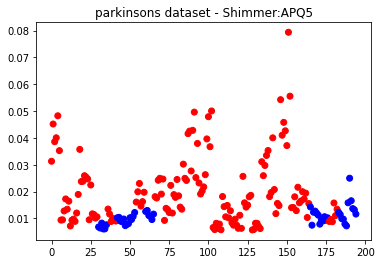

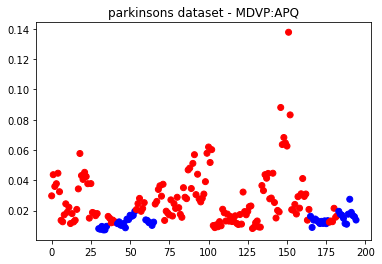

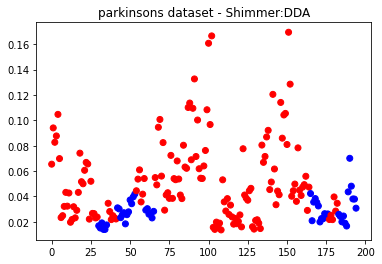

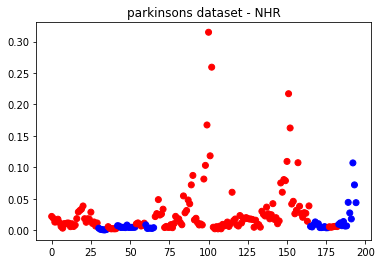

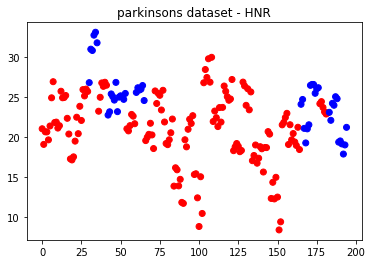

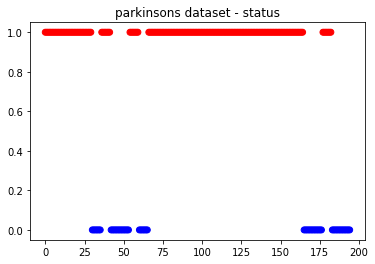

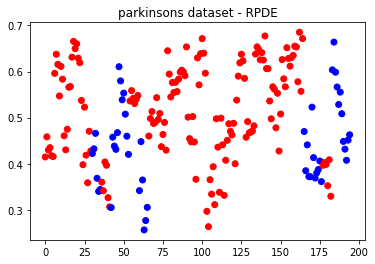

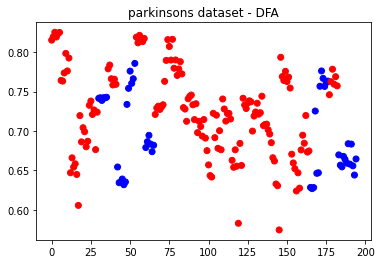

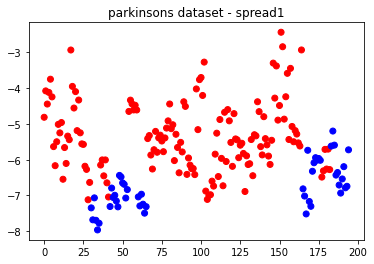

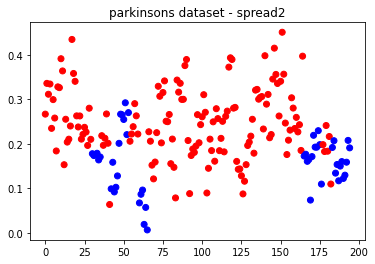

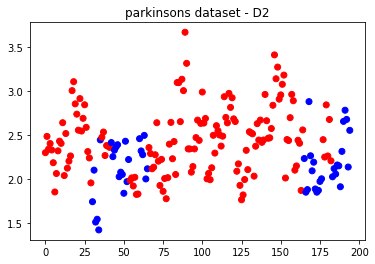

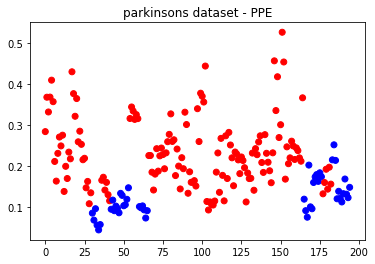

In [4]:
import matplotlib.pyplot as plt

colors = {1:"red", 0:"blue"}

def graph_attribute(data, dataset_name, attribute, solution):
    plt.title(dataset_name + " dataset - " + attribute)
    plt.scatter(data.index, data[attribute], color=data[solution].map(colors))
    plt.show()
    
for col in data:
    if col != "name":
        graph_attribute(data, "parkinsons", col, "status")

In [57]:
# Data Pre-Processing

data_numpy = data.to_numpy()

data_numpy_rows, data_numpy_cols = data_numpy.shape

X = data_numpy[:,1:data_numpy_cols].astype("float")
Y = data_numpy[:,data_numpy_cols-7].astype("float")

In [73]:
# Model Spot Check - Known Classification Models

nn_epochs = 200
nn_batch_size = 5
knn_n_neighbors = 1
knn_metric = "manhattan"
dt_criterion = "entropy"
rf_criterion = "gini"
rf_max_depth = None
rf_n_estimators = 100

X_rows, X_cols = X.shape

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def baseline_nn():
    model = Sequential()
    model.add(Dense(25, input_dim=X_cols, activation="relu"))
    model.add(Dense(1))
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

def baseline_knn():
    model = KNeighborsClassifier(n_neighbors=knn_n_neighbors, metric=knn_metric)
    return model

def baseline_gnb():
    model = GaussianNB()
    return model

def baseline_dt():
    model = DecisionTreeClassifier(criterion=dt_criterion)
    return model

def baseline_rf():
    model = RandomForestClassifier(criterion=rf_criterion, max_depth = rf_max_depth, n_estimators=rf_n_estimators)
    return model

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

kfold = KFold(n_splits=10, shuffle=True)

estimators_nn = []
estimators_nn.append(("standardize",StandardScaler()))
estimators_nn.append(("clf",KerasClassifier(build_fn=baseline_nn, epochs=nn_epochs, batch_size=nn_batch_size)))
pipeline_nn = Pipeline(estimators_nn)

estimators_knn = []
estimators_knn.append(("standardize",StandardScaler()))
estimators_knn.append(("clf",baseline_knn()))
pipeline_knn = Pipeline(estimators_knn)

estimators_gnb = []
estimators_gnb.append(("standardize",StandardScaler()))
estimators_gnb.append(("clf",baseline_gnb()))
pipeline_gnb = Pipeline(estimators_gnb)

estimators_dt = []
estimators_dt.append(("standardize",StandardScaler()))
estimators_dt.append(("clf",baseline_dt()))
pipeline_dt = Pipeline(estimators_dt)

estimators_rf = []
estimators_rf.append(("standardize",StandardScaler()))
estimators_rf.append(("clf",baseline_rf()))
pipeline_rf = Pipeline(estimators_rf)

In [74]:
result_nn = cross_val_score(pipeline_nn, X, Y, cv=kfold, scoring="accuracy")

Epoch 1/200
35/35 [==============================] - 0s 1ms/step - loss: 3.8479 - accuracy: 0.5314
Epoch 2/200
35/35 [==============================] - 0s 1ms/step - loss: 1.8012 - accuracy: 0.7314
Epoch 3/200
35/35 [==============================] - 0s 1ms/step - loss: 0.9311 - accuracy: 0.8343
Epoch 4/200
35/35 [==============================] - 0s 938us/step - loss: 0.4818 - accuracy: 0.8800
Epoch 5/200
35/35 [==============================] - 0s 920us/step - loss: 0.1751 - accuracy: 0.9143
Epoch 6/200
35/35 [==============================] - 0s 945us/step - loss: 0.1049 - accuracy: 0.9600
Epoch 7/200
35/35 [==============================] - 0s 995us/step - loss: 0.0857 - accuracy: 0.9714
Epoch 8/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0712 - accuracy: 0.9771
Epoch 9/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0585 - accuracy: 0.9771
Epoch 10/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0481 - accuracy: 0.9943
E

35/35 [==============================] - 0s 956us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 81/200
35/35 [==============================] - 0s 958us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 82/200
35/35 [==============================] - 0s 922us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 83/200
35/35 [==============================] - 0s 933us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 84/200
35/35 [==============================] - 0s 943us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 85/200
35/35 [==============================] - 0s 976us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 86/200
35/35 [==============================] - 0s 976us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 87/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 88/200
35/35 [==============================] - 0s 960us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 89/200
35/35 [==============================] - 0s 968u

Epoch 157/200
35/35 [==============================] - 0s 927us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 158/200
35/35 [==============================] - 0s 929us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 159/200
35/35 [==============================] - 0s 926us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 160/200
35/35 [==============================] - 0s 939us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 161/200
35/35 [==============================] - 0s 932us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 162/200
35/35 [==============================] - 0s 919us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 163/200
35/35 [==============================] - 0s 917us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 164/200
35/35 [==============================] - 0s 926us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 165/200
35/35 [==============================] - 0s 929us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 166/200
35/35 [================

/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


35/35 [==============================] - 1s 963us/step - loss: 5.7425 - accuracy: 0.4857
Epoch 2/200
35/35 [==============================] - 0s 1ms/step - loss: 4.9676 - accuracy: 0.5943
Epoch 3/200
35/35 [==============================] - 0s 978us/step - loss: 4.6415 - accuracy: 0.6171
Epoch 4/200
35/35 [==============================] - 0s 928us/step - loss: 4.2388 - accuracy: 0.6457
Epoch 5/200
35/35 [==============================] - 0s 936us/step - loss: 3.6108 - accuracy: 0.6800
Epoch 6/200
35/35 [==============================] - 0s 955us/step - loss: 3.0943 - accuracy: 0.7086
Epoch 7/200
35/35 [==============================] - 0s 959us/step - loss: 2.2034 - accuracy: 0.7429
Epoch 8/200
35/35 [==============================] - 0s 952us/step - loss: 1.1817 - accuracy: 0.7886
Epoch 9/200
35/35 [==============================] - 0s 1ms/step - loss: 0.4024 - accuracy: 0.9143
Epoch 10/200
35/35 [==============================] - 0s 955us/step - loss: 0.1566 - accuracy: 0.9543
Epoch

35/35 [==============================] - 0s 944us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 81/200
35/35 [==============================] - 0s 979us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 82/200
35/35 [==============================] - 0s 966us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 83/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 84/200
35/35 [==============================] - 0s 993us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 85/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 86/200
35/35 [==============================] - 0s 941us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 87/200
35/35 [==============================] - 0s 919us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 88/200
35/35 [==============================] - 0s 959us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 89/200
35/35 [==============================] - 0s 938us/

35/35 [==============================] - 0s 976us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 158/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 159/200
35/35 [==============================] - 0s 980us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 160/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 161/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 162/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 163/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 164/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 165/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 166/200
35/35 [==============================] - 0s 1ms/ste

/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


35/35 [==============================] - 0s 1ms/step - loss: 9.9990 - accuracy: 0.2457
Epoch 2/200
35/35 [==============================] - 0s 1ms/step - loss: 8.6201 - accuracy: 0.2686
Epoch 3/200
35/35 [==============================] - 0s 999us/step - loss: 7.2463 - accuracy: 0.3657
Epoch 4/200
35/35 [==============================] - 0s 1ms/step - loss: 5.5458 - accuracy: 0.4629
Epoch 5/200
35/35 [==============================] - 0s 956us/step - loss: 3.8734 - accuracy: 0.5714
Epoch 6/200
35/35 [==============================] - 0s 964us/step - loss: 3.4752 - accuracy: 0.6457
Epoch 7/200
35/35 [==============================] - 0s 968us/step - loss: 3.2217 - accuracy: 0.6629
Epoch 8/200
35/35 [==============================] - 0s 950us/step - loss: 2.7164 - accuracy: 0.6971
Epoch 9/200
35/35 [==============================] - 0s 1ms/step - loss: 2.1267 - accuracy: 0.7486
Epoch 10/200
35/35 [==============================] - 0s 978us/step - loss: 1.5183 - accuracy: 0.7886
Epoch 11/

35/35 [==============================] - 0s 943us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 83/200
35/35 [==============================] - 0s 996us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 84/200
35/35 [==============================] - 0s 956us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 85/200
35/35 [==============================] - 0s 973us/step - loss: 9.9550e-04 - accuracy: 1.0000
Epoch 86/200
35/35 [==============================] - 0s 1ms/step - loss: 7.9420e-04 - accuracy: 1.0000
Epoch 87/200
35/35 [==============================] - 0s 988us/step - loss: 6.1434e-04 - accuracy: 1.0000
Epoch 88/200
35/35 [==============================] - 0s 1ms/step - loss: 5.3633e-04 - accuracy: 1.0000
Epoch 89/200
35/35 [==============================] - 0s 972us/step - loss: 4.6413e-04 - accuracy: 1.0000
Epoch 90/200
35/35 [==============================] - 0s 993us/step - loss: 4.0539e-04 - accuracy: 1.0000
Epoch 91/200
35/35 [==============================] - 0s 979us/step - loss:

35/35 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 160/200
35/35 [==============================] - 0s 974us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 161/200
35/35 [==============================] - 0s 960us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 162/200
35/35 [==============================] - 0s 978us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 163/200
35/35 [==============================] - 0s 958us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 164/200
35/35 [==============================] - 0s 996us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 165/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 166/200
35/35 [==============================] - 0s 944us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 167/200
35/35 [==============================] - 0s 938us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 168/200
35/35 [==============================] - 

/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


35/35 [==============================] - 0s 1ms/step - loss: 4.7389 - accuracy: 0.4686
Epoch 2/200
35/35 [==============================] - 0s 975us/step - loss: 1.8892 - accuracy: 0.6457
Epoch 3/200
35/35 [==============================] - 0s 1ms/step - loss: 0.8805 - accuracy: 0.8457
Epoch 4/200
35/35 [==============================] - 0s 991us/step - loss: 0.6412 - accuracy: 0.8971
Epoch 5/200
35/35 [==============================] - 0s 989us/step - loss: 0.3117 - accuracy: 0.9314
Epoch 6/200
35/35 [==============================] - 0s 987us/step - loss: 0.2675 - accuracy: 0.9600
Epoch 7/200
35/35 [==============================] - 0s 971us/step - loss: 0.0993 - accuracy: 0.9771
Epoch 8/200
35/35 [==============================] - 0s 974us/step - loss: 0.0520 - accuracy: 0.9829
Epoch 9/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0372 - accuracy: 0.9943
Epoch 10/200
35/35 [==============================] - 0s 955us/step - loss: 0.0266 - accuracy: 1.0000
Epoch 1

35/35 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 80/200
35/35 [==============================] - 0s 958us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 81/200
35/35 [==============================] - 0s 958us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 82/200
35/35 [==============================] - 0s 988us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 83/200
35/35 [==============================] - 0s 962us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 84/200
35/35 [==============================] - 0s 996us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 85/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 86/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 87/200
35/35 [==============================] - 0s 989us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 88/200
35/35 [==============================] - 0s 986us/st

35/35 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 157/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 158/200
35/35 [==============================] - 0s 973us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 159/200
35/35 [==============================] - 0s 983us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 160/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 161/200
35/35 [==============================] - 0s 976us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 162/200
35/35 [==============================] - 0s 953us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 163/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 164/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 165/200
35/35 [==============================] - 0s 972

/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


35/35 [==============================] - 0s 981us/step - loss: 10.2238 - accuracy: 0.2514
Epoch 2/200
35/35 [==============================] - 0s 997us/step - loss: 7.0707 - accuracy: 0.4114
Epoch 3/200
35/35 [==============================] - 0s 1ms/step - loss: 5.6378 - accuracy: 0.5600
Epoch 4/200
35/35 [==============================] - 0s 1ms/step - loss: 4.8604 - accuracy: 0.6171
Epoch 5/200
35/35 [==============================] - 0s 1ms/step - loss: 4.6061 - accuracy: 0.6571
Epoch 6/200
35/35 [==============================] - 0s 1ms/step - loss: 2.9131 - accuracy: 0.6914
Epoch 7/200
35/35 [==============================] - 0s 974us/step - loss: 0.5843 - accuracy: 0.8571
Epoch 8/200
35/35 [==============================] - 0s 988us/step - loss: 0.3233 - accuracy: 0.9429
Epoch 9/200
35/35 [==============================] - 0s 1ms/step - loss: 0.1946 - accuracy: 0.9543
Epoch 10/200
35/35 [==============================] - 0s 1ms/step - loss: 0.1573 - accuracy: 0.9714
Epoch 11/200

35/35 [==============================] - 0s 977us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 81/200
35/35 [==============================] - 0s 987us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 82/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 83/200
35/35 [==============================] - 0s 962us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 84/200
35/35 [==============================] - 0s 943us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 85/200
35/35 [==============================] - 0s 980us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 86/200
35/35 [==============================] - 0s 980us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 87/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 88/200
35/35 [==============================] - 0s 994us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 89/200
35/35 [==============================] - 0s 957us/

35/35 [==============================] - 0s 956us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 158/200
35/35 [==============================] - 0s 971us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 159/200
35/35 [==============================] - 0s 1000us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 160/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 161/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 162/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 163/200
35/35 [==============================] - 0s 988us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 164/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 165/200
35/35 [==============================] - 0s 980us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 166/200
35/35 [==============================] - 0s 

/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


36/36 [==============================] - 0s 1ms/step - loss: 2.6390 - accuracy: 0.4943 
Epoch 2/200
36/36 [==============================] - 0s 1ms/step - loss: 1.3457 - accuracy: 0.6477
Epoch 3/200
36/36 [==============================] - 0s 1ms/step - loss: 1.0725 - accuracy: 0.7330
Epoch 4/200
36/36 [==============================] - 0s 1ms/step - loss: 0.9950 - accuracy: 0.7841
Epoch 5/200
36/36 [==============================] - 0s 1ms/step - loss: 0.8671 - accuracy: 0.8352
Epoch 6/200
36/36 [==============================] - 0s 1ms/step - loss: 0.8150 - accuracy: 0.8693
Epoch 7/200
36/36 [==============================] - 0s 1ms/step - loss: 0.6476 - accuracy: 0.9205
Epoch 8/200
36/36 [==============================] - 0s 1ms/step - loss: 0.3040 - accuracy: 0.9545
Epoch 9/200
36/36 [==============================] - 0s 1ms/step - loss: 0.2049 - accuracy: 0.9716
Epoch 10/200
36/36 [==============================] - 0s 1ms/step - loss: 0.1702 - accuracy: 0.9716
Epoch 11/200
36/36 [

36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 82/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 83/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 84/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 85/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 86/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 87/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 88/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 89/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 90/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0

36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 160/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 161/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 162/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 163/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 164/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 165/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 166/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 167/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 168/200
36/36 [==============================] - 0s 1ms/step - 

/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


36/36 [==============================] - 0s 1ms/step - loss: 6.2525 - accuracy: 0.4034
Epoch 2/200
36/36 [==============================] - 0s 1ms/step - loss: 4.1975 - accuracy: 0.5170
Epoch 3/200
36/36 [==============================] - 0s 1ms/step - loss: 3.2004 - accuracy: 0.6136
Epoch 4/200
36/36 [==============================] - 0s 1ms/step - loss: 2.8063 - accuracy: 0.7216
Epoch 5/200
36/36 [==============================] - 0s 1ms/step - loss: 2.7457 - accuracy: 0.7443
Epoch 6/200
36/36 [==============================] - 0s 1ms/step - loss: 2.5321 - accuracy: 0.7557
Epoch 7/200
36/36 [==============================] - 0s 1ms/step - loss: 1.4246 - accuracy: 0.8182
Epoch 8/200
36/36 [==============================] - 0s 1ms/step - loss: 1.1209 - accuracy: 0.8352
Epoch 9/200
36/36 [==============================] - 0s 1ms/step - loss: 1.0082 - accuracy: 0.8466
Epoch 10/200
36/36 [==============================] - 0s 1ms/step - loss: 0.8491 - accuracy: 0.8523
Epoch 11/200
36/36 [=

36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 83/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 84/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 85/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 86/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 87/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 88/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 89/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 90/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 91/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0

36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 161/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 162/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 163/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 164/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 165/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 166/200
36/36 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 167/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 168/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 169/200
36/36 [==============================] - 0s 1ms/step - 

/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


36/36 [==============================] - 0s 1ms/step - loss: 8.1053 - accuracy: 0.2045
Epoch 2/200
36/36 [==============================] - 0s 1ms/step - loss: 6.6674 - accuracy: 0.3409
Epoch 3/200
36/36 [==============================] - 0s 1ms/step - loss: 4.5739 - accuracy: 0.4375
Epoch 4/200
36/36 [==============================] - 0s 1ms/step - loss: 3.1040 - accuracy: 0.5511
Epoch 5/200
36/36 [==============================] - 0s 1ms/step - loss: 1.7934 - accuracy: 0.6705
Epoch 6/200
36/36 [==============================] - 0s 1ms/step - loss: 0.4428 - accuracy: 0.8068
Epoch 7/200
36/36 [==============================] - 0s 1ms/step - loss: 0.3803 - accuracy: 0.8466
Epoch 8/200
36/36 [==============================] - 0s 1ms/step - loss: 0.3017 - accuracy: 0.8523
Epoch 9/200
36/36 [==============================] - 0s 1ms/step - loss: 0.2521 - accuracy: 0.8864
Epoch 10/200
36/36 [==============================] - 0s 1ms/step - loss: 0.2375 - accuracy: 0.8920
Epoch 11/200
36/36 [=

36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 83/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 84/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 85/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 86/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 87/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 88/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 89/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 90/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 91/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0

36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 161/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 162/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 163/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 164/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 165/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 166/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 167/200
36/36 [==============================] - 0s 994us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 168/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 169/200
36/36 [==============================] - 0s 1ms/step 

/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


36/36 [==============================] - 0s 1ms/step - loss: 5.6624 - accuracy: 0.4659
Epoch 2/200
36/36 [==============================] - 0s 1ms/step - loss: 4.2328 - accuracy: 0.6193
Epoch 3/200
36/36 [==============================] - 0s 1ms/step - loss: 3.5354 - accuracy: 0.7216
Epoch 4/200
36/36 [==============================] - 0s 1ms/step - loss: 3.2238 - accuracy: 0.7500
Epoch 5/200
36/36 [==============================] - 0s 1ms/step - loss: 3.1160 - accuracy: 0.7784
Epoch 6/200
36/36 [==============================] - 0s 1ms/step - loss: 1.8097 - accuracy: 0.8068
Epoch 7/200
36/36 [==============================] - 0s 1ms/step - loss: 0.3597 - accuracy: 0.9261
Epoch 8/200
36/36 [==============================] - 0s 1ms/step - loss: 0.1918 - accuracy: 0.9659
Epoch 9/200
36/36 [==============================] - 0s 1ms/step - loss: 0.1707 - accuracy: 0.9716
Epoch 10/200
36/36 [==============================] - 0s 1ms/step - loss: 0.1537 - accuracy: 0.9830
Epoch 11/200
36/36 [=

36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 82/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 83/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 84/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 85/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 86/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 87/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 88/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 89/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 90/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0

36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 160/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 161/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 162/200
36/36 [==============================] - 0s 992us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 163/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 164/200
36/36 [==============================] - 0s 990us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 165/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 166/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 167/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 168/200
36/36 [==============================] - 0s 1ms/ste

/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


36/36 [==============================] - 0s 1ms/step - loss: 1.1225 - accuracy: 0.6932
Epoch 2/200
36/36 [==============================] - 0s 1ms/step - loss: 0.4562 - accuracy: 0.8750
Epoch 3/200
36/36 [==============================] - 0s 1ms/step - loss: 0.2128 - accuracy: 0.9091
Epoch 4/200
36/36 [==============================] - 0s 1ms/step - loss: 0.1377 - accuracy: 0.9545
Epoch 5/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0953 - accuracy: 0.9773
Epoch 6/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0646 - accuracy: 0.9886
Epoch 7/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0427 - accuracy: 1.0000
Epoch 8/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0275 - accuracy: 1.0000
Epoch 9/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0176 - accuracy: 1.0000
Epoch 10/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0109 - accuracy: 1.0000
Epoch 11/200
36/36 [=

36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 81/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 82/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 83/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 84/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 85/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 86/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 87/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 88/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 89/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0

36/36 [==============================] - 0s 997us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 159/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 160/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 161/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 162/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 163/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 164/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 165/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 166/200
36/36 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 167/200
36/36 [==============================] - 0s 1ms/step 

/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [75]:
print("Baseline NN: %.2f (%.2f)" % (result_nn.mean()*100,result_nn.std()*100))

Baseline NN: 100.00 (0.00)


In [63]:
result_knn = cross_val_score(pipeline_knn, X, Y, cv=kfold, scoring="accuracy")
print("Baseline KNN: %.2f (%.2f)" % (result_knn.mean()*100,result_knn.std()*100))

Baseline KNN: 100.00 (0.00)


In [40]:
result_gnb = cross_val_score(pipeline_gnb, X, Y, cv=kfold, scoring="accuracy")
print("Baseline GNB: %.2f (%.2f)" % (result_gnb.mean()*100,result_gnb.std()*100))

Baseline GNB: 100.00 (0.00)


In [42]:
result_dt = cross_val_score(pipeline_dt, X, Y, cv=kfold, scoring="accuracy")
print("Baseline DT: %.2f (%.2f)" % (result_dt.mean()*100,result_dt.std()*100))

Baseline DT: 100.00 (0.00)


In [43]:
result_rf = cross_val_score(pipeline_rf, X, Y, cv=kfold, scoring="accuracy")
print("Baseline RF: %.2f (%.2f)" % (result_rf.mean()*100,result_rf.std()*100))

Baseline RF: 100.00 (0.00)


In [53]:
# Model Spot Check Predictions

def print_predictions(pipeline):
    pipeline.fit(X,Y)
    predictions = pipeline.predict(X)
    data_with_predictions = data.copy()
    data_with_predictions["model_predictions"] = predictions
    return data_with_predictions

print_predictions(pipeline_gnb)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,model_predictions
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.000070,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1.0
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.000080,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1.0
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1.0
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.000090,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1.0
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.000110,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1.0
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.000080,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775,1.0
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.000030,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756,1.0
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.000030,0.00144,0.00182,0.00431,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755,1.0
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.000060,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571,1.0
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.000060,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362,1.0


In [60]:
# New Algorithm - Support Vector Machines

from sklearn.svm import SVC

svm_C = 1.0 # default is 1.0, tuning parameter - how much wiggle room from hyperplane, essentially.
svm_kernel = "rbf" # default is rbf (radial basis function) - kernel type. linear, poly, rbf, sigmoid, precomputed
svm_degree = 3 # default 3, ONLY if poly is used, ignored otherwise.
svm_gamma = 'scale' # default is scale, or float.  Used w/ poly, rbf, sigmoid. 

def baseline_svm():
    model = SVC(C=svm_C, kernel=svm_kernel, degree=svm_degree, gamma=svm_gamma)
    return model

estimators_svm = []
estimators_svm.append(("standardize",StandardScaler()))
estimators_svm.append(("clf",baseline_svm()))
pipeline_svm = Pipeline(estimators_svm)

result_svm = cross_val_score(pipeline_svm, X, Y, cv=kfold, scoring="accuracy")
print("Baseline SVM: %.2f (%.2f)" % (result_svm.mean()*100,result_svm.std()*100))

Baseline SVM: 100.00 (0.00)
